# Iran

## Basic Data (Import and Visualization)

### Start (Importing Libraries)

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

### Read data and Plotting

In [2]:
df = pd.read_csv('/Users/abdul/Documents/Academics/Metnum/UTS/dataset/csv/iran.csv')
type(df)

pandas.core.frame.DataFrame

In [3]:
df.shape

(41, 5)

In [4]:
df.columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
df

,Confirmed,New,Deaths,Active
Date,,,,
2020-02-15,0,0,0,0
2020-02-16,0,0,0,0
2020-02-17,0,0,0,0
2020-02-18,0,0,0,0
2020-02-19,2,0,2,0
2020-02-20,5,3,2,3
2020-02-21,18,13,4,14
2020-02-22,28,10,6,23
2020-02-23,43,15,8,34


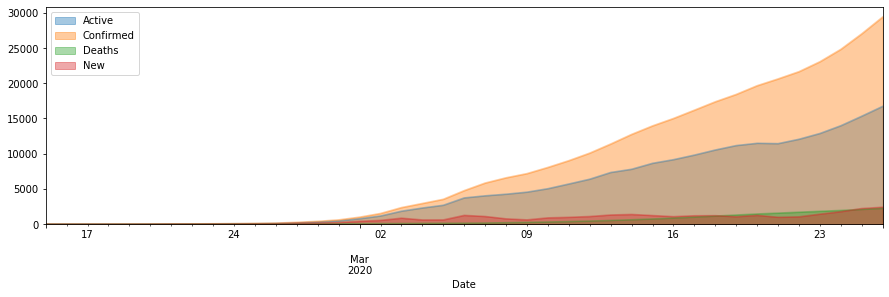

In [93]:
df.plot.area(y=["Active", "Confirmed", "Deaths", "New"], figsize=(15,4), alpha=0.4, subplots=False, stacked=False)
fig.autofmt_xdate()

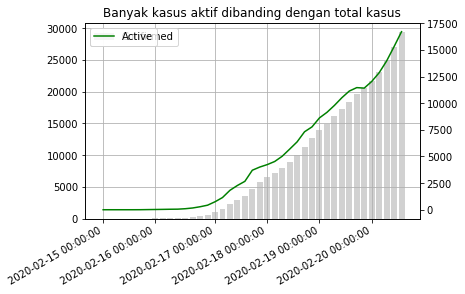

In [101]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df.index, df["Confirmed"], color=(190/255,190/255,190/255,0.7), label='Confirmed')
ax2.plot(df.index, df["Active"], color='green', label='Active')
ax.set_xticklabels(df.index)
ax.legend(loc='best')
ax2.legend(loc='best')
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set_title('Banyak kasus aktif dibanding dengan total kasus')
fig.autofmt_xdate()

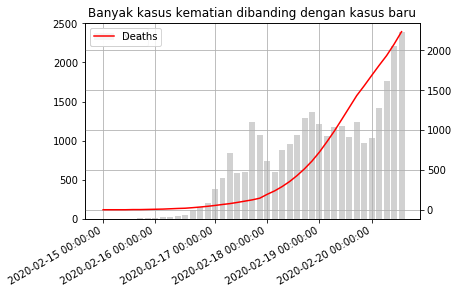

In [103]:
fig, ax3 = plt.subplots()
ax4 = ax3.twinx()
ax3.bar(df.index, df["New"], color=(190/255,190/255,190/255,0.7), label='New')
ax4.plot(df.index, df["Deaths"], color='red', label='Deaths')
ax3.set_xticklabels(df.index)
ax3.legend(loc='best')
ax4.legend(loc='best')
ax3.xaxis.grid(True)
ax4.yaxis.grid(True)
ax3.set_title('Banyak kasus kematian dibanding dengan kasus baru')
fig.autofmt_xdate()

## Regressions

### Active 

- Start: 20-Feb-2020
- End: 26-Mar-2020
- Range: 36 Days

**Data**

In [11]:
y = np.array ((3, 14, 23, 34, 46, 54, 95, 165, 281, 427, 749, 1144, 1824, 2278, 2666, 3710, 4009, 4238, 4530, 5020, 5687, 6370, 7321, 7779, 8624, 9142, 9792, 10516, 11144, 11466, 11419, 12040, 12861, 13964, 15315, 16715))
y = y.astype('float64')
y

array([3.0000e+00, 1.4000e+01, 2.3000e+01, 3.4000e+01, 4.6000e+01,
       5.4000e+01, 9.5000e+01, 1.6500e+02, 2.8100e+02, 4.2700e+02,
       7.4900e+02, 1.1440e+03, 1.8240e+03, 2.2780e+03, 2.6660e+03,
       3.7100e+03, 4.0090e+03, 4.2380e+03, 4.5300e+03, 5.0200e+03,
       5.6870e+03, 6.3700e+03, 7.3210e+03, 7.7790e+03, 8.6240e+03,
       9.1420e+03, 9.7920e+03, 1.0516e+04, 1.1144e+04, 1.1466e+04,
       1.1419e+04, 1.2040e+04, 1.2861e+04, 1.3964e+04, 1.5315e+04,
       1.6715e+04])

In [12]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

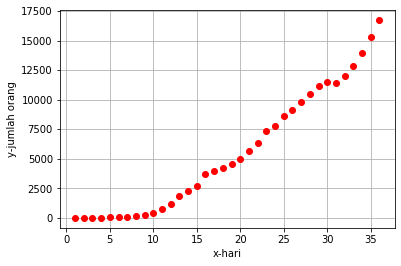

In [13]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

**Data**

In [14]:
y = np.array ((3, 14, 23, 34, 46, 54, 95, 165, 281, 427, 749, 1144, 1824, 2278, 2666, 3710, 4009, 4238, 4530, 5020, 5687, 6370, 7321, 7779, 8624, 9142, 9792, 10516, 11144, 11466, 11419, 12040, 12861, 13964, 15315, 16715))
y = y.astype('float64')
y

array([3.0000e+00, 1.4000e+01, 2.3000e+01, 3.4000e+01, 4.6000e+01,
       5.4000e+01, 9.5000e+01, 1.6500e+02, 2.8100e+02, 4.2700e+02,
       7.4900e+02, 1.1440e+03, 1.8240e+03, 2.2780e+03, 2.6660e+03,
       3.7100e+03, 4.0090e+03, 4.2380e+03, 4.5300e+03, 5.0200e+03,
       5.6870e+03, 6.3700e+03, 7.3210e+03, 7.7790e+03, 8.6240e+03,
       9.1420e+03, 9.7920e+03, 1.0516e+04, 1.1144e+04, 1.1466e+04,
       1.1419e+04, 1.2040e+04, 1.2861e+04, 1.3964e+04, 1.5315e+04,
       1.6715e+04])

In [15]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36.])

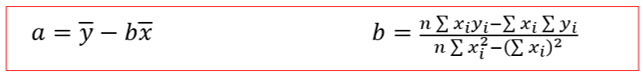

**Membuat xreg untuk plotting selanjutnya**

In [16]:
#membuat xreg
xreg = np.array(range(10,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

**Regresi berpangkat**

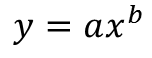

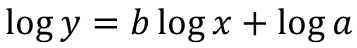

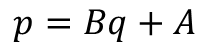

In [17]:
p = np.log10(y)
q = np.log10(x)

**Hitung regresi linear**

In [18]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [19]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 2.7118q + 0.0755


**Kembalikan ke bentuk pangkat**

In [20]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 1.1899x^(2.7118)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [21]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9843 dan r^2 = 0.9688


**Plot**

In [22]:
#membuat yreg
yreg = a*(xreg**b)
yreg
    

array([1.18990527e+00, 1.54085764e+00, 1.95091727e+00, 2.42386231e+00,
       2.96338100e+00, 3.57308055e+00, 4.25649451e+00, 5.01708907e+00,
       5.85826849e+00, 6.78337968e+00, 7.79571638e+00, 8.89852266e+00,
       1.00949962e+01, 1.13882909e+01, 1.27815197e+01, 1.42777569e+01,
       1.58800398e+01, 1.75913711e+01, 1.94147201e+01, 2.13530249e+01,
       2.34091933e+01, 2.55861044e+01, 2.78866097e+01, 3.03135344e+01,
       3.28696782e+01, 3.55578168e+01, 3.83807019e+01, 4.13410632e+01,
       4.44416084e+01, 4.76850240e+01, 5.10739764e+01, 5.46111125e+01,
       5.82990600e+01, 6.21404281e+01, 6.61378083e+01, 7.02937749e+01,
       7.46108852e+01, 7.90916801e+01, 8.37386850e+01, 8.85544095e+01,
       9.35413482e+01, 9.87019814e+01, 1.04038775e+02, 1.09554180e+02,
       1.15250636e+02, 1.21130568e+02, 1.27196387e+02, 1.33450494e+02,
       1.39895276e+02, 1.46533107e+02, 1.53366353e+02, 1.60397364e+02,
       1.67628481e+02, 1.75062034e+02, 1.82700342e+02, 1.90545713e+02,
      

Text(0, 0.5, 'y-banyak orang')

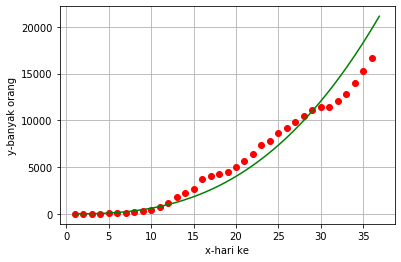

In [23]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

#### Regresi Eksponensial

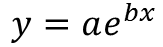

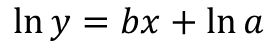

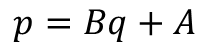

**Linearisasi**

In [24]:
y = np.array ((3, 14, 23, 34, 46, 54, 95, 165, 281, 427, 749, 1144, 1824, 2278, 2666, 3710, 4009, 4238, 4530, 5020, 5687, 6370, 7321, 7779, 8624, 9142, 9792, 10516, 11144, 11466, 11419, 12040, 12861, 13964, 15315, 16715))
y = y.astype('float64')
y

array([3.0000e+00, 1.4000e+01, 2.3000e+01, 3.4000e+01, 4.6000e+01,
       5.4000e+01, 9.5000e+01, 1.6500e+02, 2.8100e+02, 4.2700e+02,
       7.4900e+02, 1.1440e+03, 1.8240e+03, 2.2780e+03, 2.6660e+03,
       3.7100e+03, 4.0090e+03, 4.2380e+03, 4.5300e+03, 5.0200e+03,
       5.6870e+03, 6.3700e+03, 7.3210e+03, 7.7790e+03, 8.6240e+03,
       9.1420e+03, 9.7920e+03, 1.0516e+04, 1.1144e+04, 1.1466e+04,
       1.1419e+04, 1.2040e+04, 1.2861e+04, 1.3964e+04, 1.5315e+04,
       1.6715e+04])

In [25]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36.])

In [26]:
p = np.log(y)
q = x

**Hitung regresi linear**

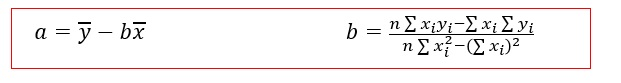

In [27]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil persamaan linear**

In [28]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 0.2069q + 3.5562


**Hitung kembali dalam bentuk bilangan berpangkat**

In [29]:
a = np.e**A
b = B

In [30]:
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 35.0310x^(0.2069)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [31]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9144 dan r^2 = 0.8362


**Plot data dan regresinya**

In [32]:
#membuat xreg
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [33]:
#membuat yreg
yreg = a*np.e**(b*xreg)
yreg

array([3.50310347e+01, 3.57634607e+01, 3.65112001e+01, 3.72745733e+01,
       3.80539069e+01, 3.88495348e+01, 3.96617977e+01, 4.04910432e+01,
       4.13376266e+01, 4.22019102e+01, 4.30842642e+01, 4.39850664e+01,
       4.49047025e+01, 4.58435663e+01, 4.68020598e+01, 4.77805933e+01,
       4.87795860e+01, 4.97994655e+01, 5.08406686e+01, 5.19036410e+01,
       5.29888380e+01, 5.40967242e+01, 5.52277740e+01, 5.63824717e+01,
       5.75613117e+01, 5.87647988e+01, 5.99934483e+01, 6.12477863e+01,
       6.25283499e+01, 6.38356875e+01, 6.51703587e+01, 6.65329351e+01,
       6.79240002e+01, 6.93441495e+01, 7.07939912e+01, 7.22741460e+01,
       7.37852478e+01, 7.53279436e+01, 7.69028940e+01, 7.85107733e+01,
       8.01522700e+01, 8.18280870e+01, 8.35389418e+01, 8.52855670e+01,
       8.70687105e+01, 8.88891358e+01, 9.07476225e+01, 9.26449662e+01,
       9.45819794e+01, 9.65594915e+01, 9.85783493e+01, 1.00639417e+02,
       1.02743578e+02, 1.04891732e+02, 1.07084799e+02, 1.09323720e+02,
      

Text(0, 0.5, 'y-banyak orang')

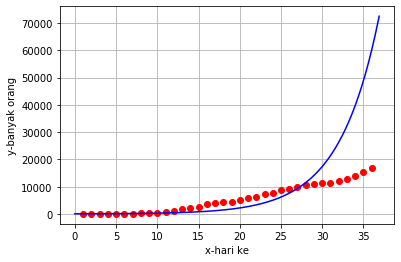

In [34]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

**Selesai**

#### Regresi Polinomial

In [35]:
y = np.array ((3, 14, 23, 34, 46, 54, 95, 165, 281, 427, 749, 1144, 1824, 2278, 2666, 3710, 4009, 4238, 4530, 5020, 5687, 6370, 7321, 7779, 8624, 9142, 9792, 10516, 11144, 11466, 11419, 12040, 12861, 13964, 15315, 16715))
y = y.astype('float64')
y

array([3.0000e+00, 1.4000e+01, 2.3000e+01, 3.4000e+01, 4.6000e+01,
       5.4000e+01, 9.5000e+01, 1.6500e+02, 2.8100e+02, 4.2700e+02,
       7.4900e+02, 1.1440e+03, 1.8240e+03, 2.2780e+03, 2.6660e+03,
       3.7100e+03, 4.0090e+03, 4.2380e+03, 4.5300e+03, 5.0200e+03,
       5.6870e+03, 6.3700e+03, 7.3210e+03, 7.7790e+03, 8.6240e+03,
       9.1420e+03, 9.7920e+03, 1.0516e+04, 1.1144e+04, 1.1466e+04,
       1.1419e+04, 1.2040e+04, 1.2861e+04, 1.3964e+04, 1.5315e+04,
       1.6715e+04])

In [36]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36.])

**Membentuk regresi polinomial dari matriks**

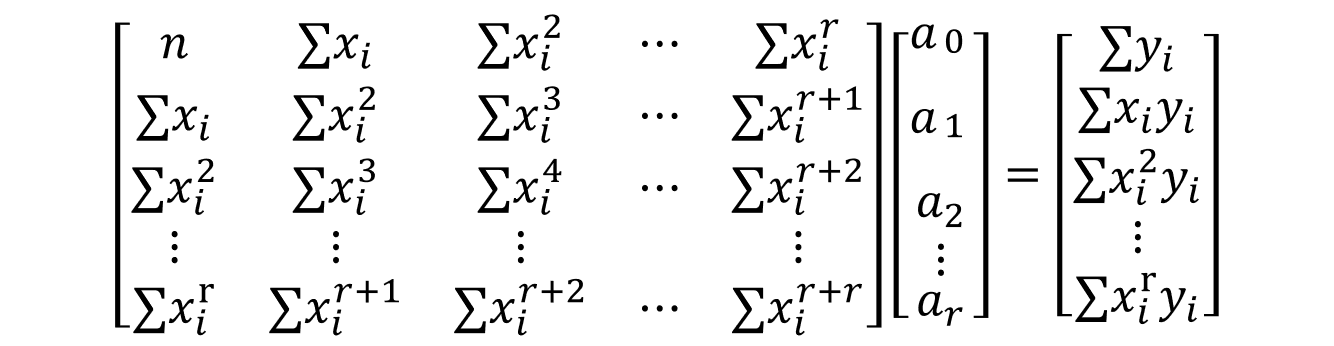

**Mendefinisikan elemen-elemen matriks kiri**

In [37]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[3.60000000e+01, 6.66000000e+02, 1.62060000e+04, 4.43556000e+05],
       [6.66000000e+02, 1.62060000e+04, 4.43556000e+05, 1.29485940e+07],
       [1.62060000e+04, 4.43556000e+05, 1.29485940e+07, 3.93729876e+08],
       [4.43556000e+05, 1.29485940e+07, 3.93729876e+08, 1.23134971e+10]])

**Mendefinisikan elemen-elemen matriks kanan**

In [38]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[2.01465000e+05],
       [5.58755100e+06],
       [1.63282457e+08],
       [4.95355374e+09]])

**Invers matriks sisi kiri**

In [39]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 5.51481199e-01, -1.13134143e-01,  6.19641796e-03,
        -9.90295108e-05],
       [-1.13134143e-01,  2.93935562e-02, -1.77983924e-03,
         3.00769135e-05],
       [ 6.19641796e-03, -1.77983924e-03,  1.14246244e-04,
        -2.00464597e-06],
       [-9.90295108e-05,  3.00769135e-05, -2.00464597e-06,
         3.61197472e-08]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [40]:
Y = Ainv.dot(B)
print(Y)

[[ 179.7143706 ]
 [-183.49282947]
 [  27.70475783]
 [  -0.29710295]]


In [41]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [42]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = -0.2971x^3 + 27.7048X^2 + -183.4928x + 179.7144


In [48]:
y

array([3.0000e+00, 1.4000e+01, 2.3000e+01, 3.4000e+01, 4.6000e+01,
       5.4000e+01, 9.5000e+01, 1.6500e+02, 2.8100e+02, 4.2700e+02,
       7.4900e+02, 1.1440e+03, 1.8240e+03, 2.2780e+03, 2.6660e+03,
       3.7100e+03, 4.0090e+03, 4.2380e+03, 4.5300e+03, 5.0200e+03,
       5.6870e+03, 6.3700e+03, 7.3210e+03, 7.7790e+03, 8.6240e+03,
       9.1420e+03, 9.7920e+03, 1.0516e+04, 1.1144e+04, 1.1466e+04,
       1.1419e+04, 1.2040e+04, 1.2861e+04, 1.3964e+04, 1.5315e+04,
       1.6715e+04])

**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [49]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9972 dan r^2 = 0.8362


**Plot**

Text(0, 0.5, 'y')

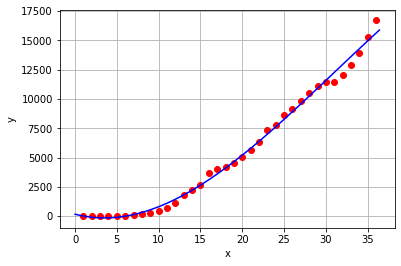

In [45]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

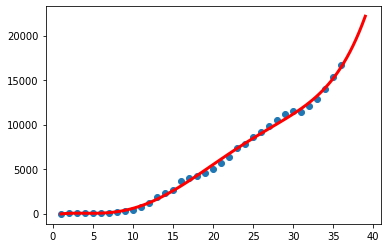

In [46]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, 36, 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [47]:
print (regpoly)

          5          4         3         2
0.002977 x - 0.2534 x + 7.197 x - 62.53 x + 207.2 x - 193.1


In [124]:
print(r2_score(y, regpoly(x)))

0.9980861672262538


**Selesai**

### Total Death

- Start: 19-Feb-2020
- End: 26-Mar-2020
- Range: 37 Days

**Data**

In [50]:
y = np.array ((2, 2, 4, 6, 8, 12, 16, 19, 26, 34, 43, 54, 66, 77, 92, 108, 124, 145, 194, 237, 291, 354, 429, 514, 611, 724, 853, 988, 1135, 1284, 1433, 1556, 1685, 1812, 1934, 2077, 2234))
y = y.astype('float64')
y

array([2.000e+00, 2.000e+00, 4.000e+00, 6.000e+00, 8.000e+00, 1.200e+01,
       1.600e+01, 1.900e+01, 2.600e+01, 3.400e+01, 4.300e+01, 5.400e+01,
       6.600e+01, 7.700e+01, 9.200e+01, 1.080e+02, 1.240e+02, 1.450e+02,
       1.940e+02, 2.370e+02, 2.910e+02, 3.540e+02, 4.290e+02, 5.140e+02,
       6.110e+02, 7.240e+02, 8.530e+02, 9.880e+02, 1.135e+03, 1.284e+03,
       1.433e+03, 1.556e+03, 1.685e+03, 1.812e+03, 1.934e+03, 2.077e+03,
       2.234e+03])

In [51]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

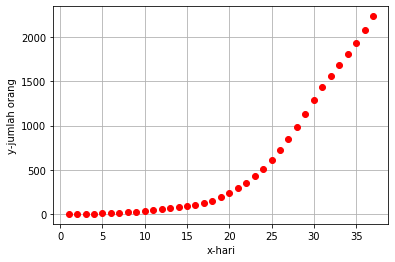

In [52]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

**Data**

In [53]:
y = np.array ((2, 2, 4, 6, 8, 12, 16, 19, 26, 34, 43, 54, 66, 77, 92, 108, 124, 145, 194, 237, 291, 354, 429, 514, 611, 724, 853, 988, 1135, 1284, 1433, 1556, 1685, 1812, 1934, 2077, 2234))
y = y.astype('float64')
y

array([2.000e+00, 2.000e+00, 4.000e+00, 6.000e+00, 8.000e+00, 1.200e+01,
       1.600e+01, 1.900e+01, 2.600e+01, 3.400e+01, 4.300e+01, 5.400e+01,
       6.600e+01, 7.700e+01, 9.200e+01, 1.080e+02, 1.240e+02, 1.450e+02,
       1.940e+02, 2.370e+02, 2.910e+02, 3.540e+02, 4.290e+02, 5.140e+02,
       6.110e+02, 7.240e+02, 8.530e+02, 9.880e+02, 1.135e+03, 1.284e+03,
       1.433e+03, 1.556e+03, 1.685e+03, 1.812e+03, 1.934e+03, 2.077e+03,
       2.234e+03])

In [54]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.])

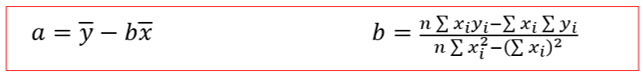

**Membuat xreg untuk plotting selanjutnya**

In [55]:
#membuat xreg
xreg = np.array(range(10,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

**Regresi berpangkat**

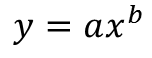

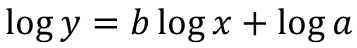

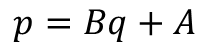

In [56]:
p = np.log10(y)
q = np.log10(x)

**Hitung regresi linear**

In [57]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [58]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 2.3576q -0.5796


**Kembalikan ke bentuk pangkat**

In [59]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 0.2633x^(2.3576)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [60]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9654 dan r^2 = 0.9320


**Plot**

In [61]:
#membuat yreg
yreg = a*(xreg**b)
yreg
    

array([2.63259471e-01, 3.29587696e-01, 4.04632657e-01, 4.88670059e-01,
       5.81961190e-01, 6.84754703e-01, 7.97288072e-01, 9.19788793e-01,
       1.05247539e+00, 1.19555828e+00, 1.34924047e+00, 1.51371824e+00,
       1.68918162e+00, 1.87581494e+00, 2.07379722e+00, 2.28330251e+00,
       2.50450029e+00, 2.73755574e+00, 2.98262999e+00, 3.23988037e+00,
       3.50946068e+00, 3.79152130e+00, 4.08620945e+00, 4.39366932e+00,
       4.71404225e+00, 5.04746683e+00, 5.39407906e+00, 5.75401248e+00,
       6.12739825e+00, 6.51436528e+00, 6.91504032e+00, 7.32954805e+00,
       7.75801116e+00, 8.20055042e+00, 8.65728479e+00, 9.12833145e+00,
       9.61380587e+00, 1.01138219e+01, 1.06284918e+01, 1.11579264e+01,
       1.17022349e+01, 1.22615251e+01, 1.28359035e+01, 1.34254753e+01,
       1.40303443e+01, 1.46506130e+01, 1.52863830e+01, 1.59377543e+01,
       1.66048261e+01, 1.72876963e+01, 1.79864617e+01, 1.87012182e+01,
       1.94320606e+01, 2.01790827e+01, 2.09423773e+01, 2.17220364e+01,
      

Text(0, 0.5, 'y-banyak orang')

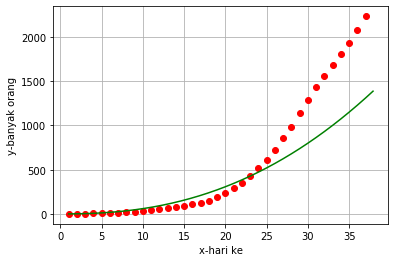

In [62]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

#### Regresi Eksponensial

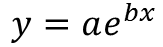

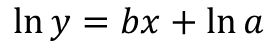

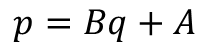

**Linearisasi**

In [63]:
y = np.array ((2, 2, 4, 6, 8, 12, 16, 19, 26, 34, 43, 54, 66, 77, 92, 108, 124, 145, 194, 237, 291, 354, 429, 514, 611, 724, 853, 988, 1135, 1284, 1433, 1556, 1685, 1812, 1934, 2077, 2234))
y = y.astype('float64')
y

array([2.000e+00, 2.000e+00, 4.000e+00, 6.000e+00, 8.000e+00, 1.200e+01,
       1.600e+01, 1.900e+01, 2.600e+01, 3.400e+01, 4.300e+01, 5.400e+01,
       6.600e+01, 7.700e+01, 9.200e+01, 1.080e+02, 1.240e+02, 1.450e+02,
       1.940e+02, 2.370e+02, 2.910e+02, 3.540e+02, 4.290e+02, 5.140e+02,
       6.110e+02, 7.240e+02, 8.530e+02, 9.880e+02, 1.135e+03, 1.284e+03,
       1.433e+03, 1.556e+03, 1.685e+03, 1.812e+03, 1.934e+03, 2.077e+03,
       2.234e+03])

In [64]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.])

In [65]:
p = np.log(y)
q = x

**Hitung regresi linear**

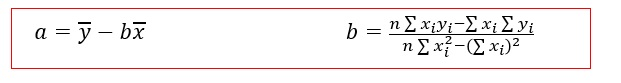

In [66]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil persamaan linear**

In [67]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 0.1926q + 1.3355


**Hitung kembali dalam bentuk bilangan berpangkat**

In [68]:
a = np.e**A
b = B

In [69]:
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 3.8021x^(0.1926)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [70]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9840 dan r^2 = 0.9682


**Plot data dan regresinya**

In [71]:
#membuat xreg
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [72]:
#membuat yreg
yreg = a*np.e**(b*xreg)
yreg

array([3.80206296e+00, 3.87599337e+00, 3.95136133e+00, 4.02819482e+00,
       4.10652231e+00, 4.18637287e+00, 4.26777611e+00, 4.35076222e+00,
       4.43536198e+00, 4.52160676e+00, 4.60952856e+00, 4.69915998e+00,
       4.79053427e+00, 4.88368531e+00, 4.97864766e+00, 5.07545654e+00,
       5.17414784e+00, 5.27475818e+00, 5.37732487e+00, 5.48188594e+00,
       5.58848019e+00, 5.69714714e+00, 5.80792711e+00, 5.92086116e+00,
       6.03599120e+00, 6.15335992e+00, 6.27301086e+00, 6.39498838e+00,
       6.51933774e+00, 6.64610504e+00, 6.77533731e+00, 6.90708248e+00,
       7.04138941e+00, 7.17830791e+00, 7.31788877e+00, 7.46018375e+00,
       7.60524563e+00, 7.75312821e+00, 7.90388633e+00, 8.05757593e+00,
       8.21425399e+00, 8.37397862e+00, 8.53680907e+00, 8.70280573e+00,
       8.87203016e+00, 9.04454513e+00, 9.22041462e+00, 9.39970386e+00,
       9.58247934e+00, 9.76880886e+00, 9.95876153e+00, 1.01524078e+01,
       1.03498195e+01, 1.05510698e+01, 1.07562333e+01, 1.09653863e+01,
      

Text(0, 0.5, 'y-banyak orang')

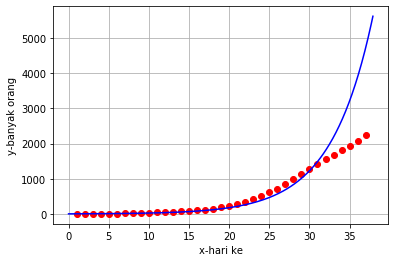

In [73]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

**Selesai**

#### Regresi Polinomial

In [74]:
y = np.array ((2, 2, 4, 6, 8, 12, 16, 19, 26, 34, 43, 54, 66, 77, 92, 108, 124, 145, 194, 237, 291, 354, 429, 514, 611, 724, 853, 988, 1135, 1284, 1433, 1556, 1685, 1812, 1934, 2077, 2234))
y = y.astype('float64')
y

array([2.000e+00, 2.000e+00, 4.000e+00, 6.000e+00, 8.000e+00, 1.200e+01,
       1.600e+01, 1.900e+01, 2.600e+01, 3.400e+01, 4.300e+01, 5.400e+01,
       6.600e+01, 7.700e+01, 9.200e+01, 1.080e+02, 1.240e+02, 1.450e+02,
       1.940e+02, 2.370e+02, 2.910e+02, 3.540e+02, 4.290e+02, 5.140e+02,
       6.110e+02, 7.240e+02, 8.530e+02, 9.880e+02, 1.135e+03, 1.284e+03,
       1.433e+03, 1.556e+03, 1.685e+03, 1.812e+03, 1.934e+03, 2.077e+03,
       2.234e+03])

In [75]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.])

**Membentuk regresi polinomial dari matriks**

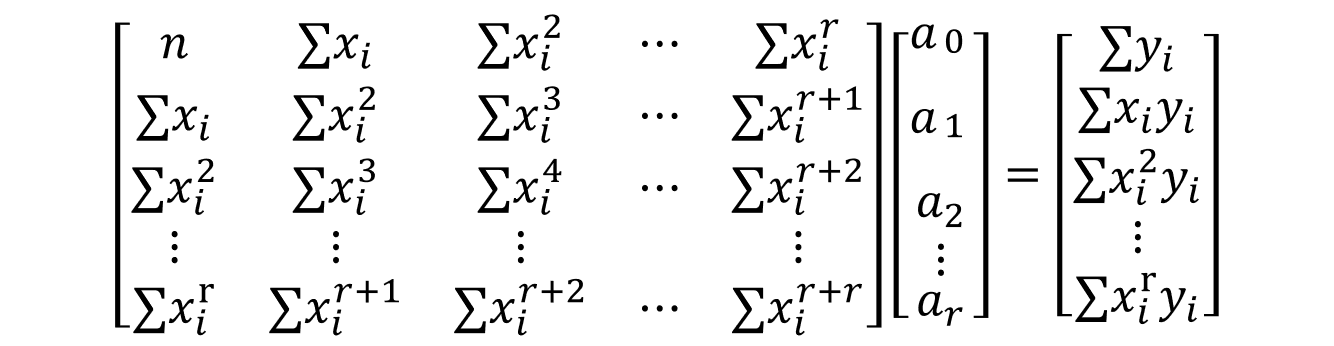

**Mendefinisikan elemen-elemen matriks kiri**

In [76]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[3.70000000e+01, 7.03000000e+02, 1.75750000e+04, 4.94209000e+05],
       [7.03000000e+02, 1.75750000e+04, 4.94209000e+05, 1.48227550e+07],
       [1.75750000e+04, 4.94209000e+05, 1.48227550e+07, 4.63073833e+08],
       [4.94209000e+05, 1.48227550e+07, 4.63073833e+08, 1.48792235e+10]])

**Mendefinisikan elemen-elemen matriks kanan**

In [77]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[2.11830000e+04],
       [6.49180000e+05],
       [2.05634200e+07],
       [6.66336352e+08]])

**Invers matriks sisi kiri**

In [78]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 5.33348475e-01, -1.06505665e-01,  5.67794685e-03,
        -8.83236177e-05],
       [-1.06505665e-01,  2.69704945e-02, -1.59031041e-03,
         2.61633389e-05],
       [ 5.67794685e-03, -1.59031041e-03,  9.94215391e-05,
        -1.69853111e-06],
       [-8.83236177e-05,  2.61633389e-05, -1.69853111e-06,
         2.97987914e-08]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [79]:
Y = Ainv.dot(B)
print(Y)

[[ 6.13415853e+01]
 [-1.60411135e+01]
 [ 5.32074500e-01]
 [ 4.21664818e-02]]


In [80]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [81]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = 0.0422x^3 + 0.5321X^2 + -16.0411x + 61.3416


In [82]:
y

array([2.000e+00, 2.000e+00, 4.000e+00, 6.000e+00, 8.000e+00, 1.200e+01,
       1.600e+01, 1.900e+01, 2.600e+01, 3.400e+01, 4.300e+01, 5.400e+01,
       6.600e+01, 7.700e+01, 9.200e+01, 1.080e+02, 1.240e+02, 1.450e+02,
       1.940e+02, 2.370e+02, 2.910e+02, 3.540e+02, 4.290e+02, 5.140e+02,
       6.110e+02, 7.240e+02, 8.530e+02, 9.880e+02, 1.135e+03, 1.284e+03,
       1.433e+03, 1.556e+03, 1.685e+03, 1.812e+03, 1.934e+03, 2.077e+03,
       2.234e+03])

**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [83]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9977 dan r^2 = 0.9682


**Plot**

Text(0, 0.5, 'y')

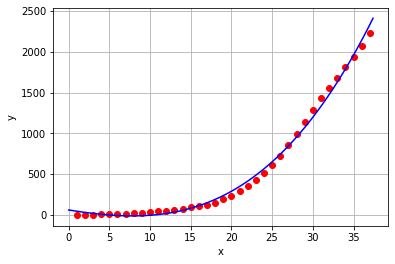

In [84]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

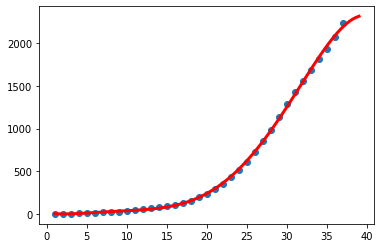

In [85]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, 65, 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [86]:
print (regpoly)

           5           4          3         2
-0.000263 x + 0.02051 x - 0.4674 x + 4.507 x - 13.78 x + 12.34


In [87]:
print(r2_score(y, regpoly(x)))

0.9995657609961824
